# **Project Name :** Store Sales Analysis
### **Name** : Shreyans Jain

### **Project Summary -**

The Store Sales Analysis project focuses on analyzing and visualizing sales data from a retail store to gain insights into sales performance, trends, and customer behavior. By examining various aspects of the store's sales data, the project aims to provide actionable insights that can guide business decisions and strategies.

### **Project Objectives:**

*  Analyze historical sales data to identify trends, patterns, and seasonality.
*   Explore sales performance across different products, categories, and time periods.
*   Identify high-performing products and low-performing products.
*   Visualize sales data using charts and graphs for better understanding.
*   Provide recommendations for improving sales, optimizing inventory, and enhancing customer experience.


### **Project Steps:**

**Data Collection:** Gather sales data from the retail store's records, including information about products, categories, prices, quantities sold, dates, and customer details.

**Data Cleaning:** Clean and preprocess the data by handling missing values, duplicates, and inconsistencies. Convert data types as needed for analysis.

**Exploratory Data Analysis (EDA):** Perform exploratory analysis to understand the distribution of sales, identify outliers, and explore relationships between variables.

**Sales Trends and Patterns:** Analyze sales trends over time (daily, monthly, yearly) to identify any seasonality, spikes, or dips in sales.

**Customer Behavior:** Analyze customer purchasing behavior, such as repeat purchases, average transaction values, and customer demographics.

**Visualizations:** Create visualizations such as line charts, bar charts, pie charts, and heatmaps to present key findings and insights effectively.

**Recommendations:** Based on the analysis, provide actionable recommendations to improve sales, optimize inventory, and enhance customer satisfaction.



## **Importing Libraries**

In [121]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

## **Dataset Loading**


In [335]:
# import data
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DS/Project/Vrinda Store Data Analysis.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Dataset First View**

In [336]:
df.sample

<bound method NDFrame.sample of        index             Order ID  Cust ID Gender  Age        Date     Status  \
0          1  171-1029312-3038738  1029312  Women   44  04-12-2022  Delivered   
1          2  405-2183842-2225946  2183842  Women   29  04-12-2022  Delivered   
2          3  171-1641533-8921966  1641533  Women   67  04-12-2022  Delivered   
3          4  404-7490807-6300351  7490807  Women   20  04-12-2022  Delivered   
4          5  403-9293516-4577154  9293516  Women   62  04-12-2022  Delivered   
...      ...                  ...      ...    ...  ...         ...        ...   
31042  31043  405-4724097-1016369  4724097      M   60  06-01-2022  Delivered   
31043  31044  405-4724097-1016369  4724097      M   34  06-01-2022  Delivered   
31044  31045  408-3572295-5992330  3572295      M   29  06-01-2022  Delivered   
31045  31046  405-1423498-9705162  1423498      M   46  06-01-2022  Delivered   
31046  31047  408-4694875-8249153  4694875      M   36  06-01-2022  Delivered

**Dataset Rows & Columns count**


In [337]:
df.shape

(31047, 19)

**Dataset Information**

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             31047 non-null  int64 
 1   Order ID          31047 non-null  object
 2   Cust ID           31047 non-null  int64 
 3   Gender            31047 non-null  object
 4   Age               31047 non-null  int64 
 5   Date              31047 non-null  object
 6   Status            31047 non-null  object
 7   Channel           31047 non-null  object
 8   SKU               31047 non-null  object
 9   Category          31047 non-null  object
 10  Size              31047 non-null  object
 11  Qty               31047 non-null  object
 12  currency          31047 non-null  object
 13  Amount            31047 non-null  int64 
 14  ship-city         31047 non-null  object
 15  ship-state        31047 non-null  object
 16  ship-postal-code  31047 non-null  int64 
 17  ship-country

## **Understanding the variable**

In [65]:
df.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Date', 'Status',
       'Channel ', 'SKU', 'Category', 'Size', 'Qty', 'currency', 'Amount',
       'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')

In [66]:
df.describe()

,index,Cust ID,Age,Amount,ship-postal-code
count,31047.00000,3.104700e+04,31047.000000,31047.000000,31047.000000
mean,15524.00000,4.936824e+06,39.496570,682.074822,460474.587206
std,8962.64124,2.900678e+06,15.117233,268.582173,198116.733009
min,1.00000,8.950000e+02,18.000000,229.000000,110001.000000
25%,7762.50000,2.416471e+06,28.000000,486.000000,313001.000000
50%,15524.00000,4.909885e+06,37.000000,646.000000,500028.000000
75%,23285.50000,7.454182e+06,47.000000,794.000000,600040.000000
max,31047.00000,9.999233e+06,78.000000,3036.000000,855117.000000


**Check Unique Values for each variable.**

In [67]:
df.apply(lambda col : col.unique())


index               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Order ID            [171-1029312-3038738, 405-2183842-2225946, 171...
Cust ID             [1029312, 2183842, 1641533, 7490807, 9293516, ...
Gender                                             [Women, Men, W, M]
Age                 [44, 29, 67, 20, 62, 49, 23, 70, 75, 43, 76, 4...
Date                [04-12-2022, 04-11-2022, 04-10-2022, 04-09-202...
Status                     [Delivered, Refunded, Cancelled, Returned]
Channel             [Myntra, Ajio, Amazon, Flipkart, Meesho, Other...
SKU                 [JNE1233-BLUE-KR-031-XXL, SET414-KR-NP-L, SET2...
Category            [kurta, Set, Western Dress, Top, Saree, Blouse...
Size                 [XXL, L, S, M, XL, XS, 3XL, Free, 6XL, 4XL, 5XL]
Qty                                         [1, One, 2, 4, 3, Two, 5]
currency                                                        [INR]
Amount              [376, 1449, 453, 729, 544, 735, 435, 385, 771,...
ship-city           

## **Data Wrangling**

**From the above info it is clear that there is no null values. While checking samples I noticed that some metrics are clean like in gender Men is represented as "Men" & "M". Let's check them out.**

In [339]:
# checking unique values
df['Gender'].value_counts()

Women    21479
Men       9452
W           74
M           42
Name: Gender, dtype: int64

**From above, it is clear to better to replace W with Women and M with Men.**

In [340]:
# replacing values
df["Gender"].replace('M','Men', inplace=True)
df["Gender"].replace('W','Women', inplace=True)

In [341]:
df['Gender'].value_counts()

Women    21553
Men       9494
Name: Gender, dtype: int64

**Now there is only 2 distinct values in gender column. Now doing same for the Quantity column**

In [342]:
# checking unique values
df['Qty'].value_counts()

1      30878
2        114
3         19
Two       16
One       13
4          6
5          1
Name: Qty, dtype: int64

**From above, it is clear to better to replace Two with 2 and One with 1.**

In [343]:
# replacing values
df["Qty"].replace('One','1', inplace=True)
df["Qty"].replace('Two', '2', inplace=True)

In [131]:
df['Qty'].value_counts()

1    30891
2      130
3       19
4        6
5        1
Name: Qty, dtype: int64

**Duplicate Values**

In [344]:
# checking duplicate values
df.duplicated().sum()

0

In [ ]:
# Remove Duplicates:
# df.drop_duplicates(inplace=True)

**I think there is clean data now. Now it would be good if we drop some colums which is not useful for data analysis**

In [345]:
# checking unique values
df['currency'].value_counts()

INR    31047
Name: currency, dtype: int64

**As there is only one currency, so dropping the column "Currency" and dropping the postal code as well, as the state, city is already mentioned.**

In [346]:
df.drop(['currency'], axis = 1, inplace=True)
df.drop(['ship-postal-code'], axis = 1, inplace=True)

**Change in datatype for required columns**

In [347]:
# change datatype
df['Qty'] = df['Qty'] .astype('int64') # changing to integer
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,"%d-%m-%Y")) # changing to datetime

**Categorizing age in different age group for better analysis**

In [349]:
def categorize_age(age):
    if age > 50:
        return "Senior"
    elif age > 30:
        return "Adult"
    else:
        return "Teenager"

# Apply the function to create a new column 'AgeGroup'
df['AgeGroup'] = df['Age'].apply(categorize_age)

print(df)


       index             Order ID  Cust ID Gender  Age       Date     Status  \
0          1  171-1029312-3038738  1029312  Women   44 2022-12-04  Delivered   
1          2  405-2183842-2225946  2183842  Women   29 2022-12-04  Delivered   
2          3  171-1641533-8921966  1641533  Women   67 2022-12-04  Delivered   
3          4  404-7490807-6300351  7490807  Women   20 2022-12-04  Delivered   
4          5  403-9293516-4577154  9293516  Women   62 2022-12-04  Delivered   
...      ...                  ...      ...    ...  ...        ...        ...   
31042  31043  405-4724097-1016369  4724097    Men   60 2022-01-06  Delivered   
31043  31044  405-4724097-1016369  4724097    Men   34 2022-01-06  Delivered   
31044  31045  408-3572295-5992330  3572295    Men   29 2022-01-06  Delivered   
31045  31046  405-1423498-9705162  1423498    Men   46 2022-01-06  Delivered   
31046  31047  408-4694875-8249153  4694875    Men   36 2022-01-06  Delivered   

       Channel                       SK

In [350]:
# checking if the the data of one year or multiple years
df['Date'].dt.year.value_counts()

2022    31047
Name: Date, dtype: int64

**As the year is only 2022, so making a column "Month" for better Analysis**

In [351]:
df['Month'] = df['Date'].dt.month


**There is an extra space in the name of the column, replacing it with the correct name (without space)**

In [352]:
# renaming the column name
df.rename(columns={"Channel ":"Channel"}, inplace=True)

## **Data Vizualization**

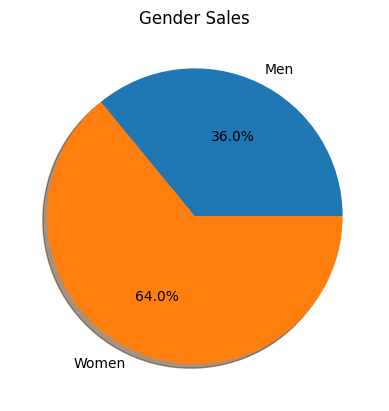

In [353]:
# Chart-1
# Counting sales on the basis of gender
highest_gender_sales = df.groupby('Gender', as_index=False)['Amount'].sum().rename(columns={'Amount':'Total Sales'})
plt.pie(highest_gender_sales['Total Sales'], labels=highest_gender_sales["Gender"], shadow=True,autopct='%1.1f%%')
plt.title("Gender Sales")
plt.show()


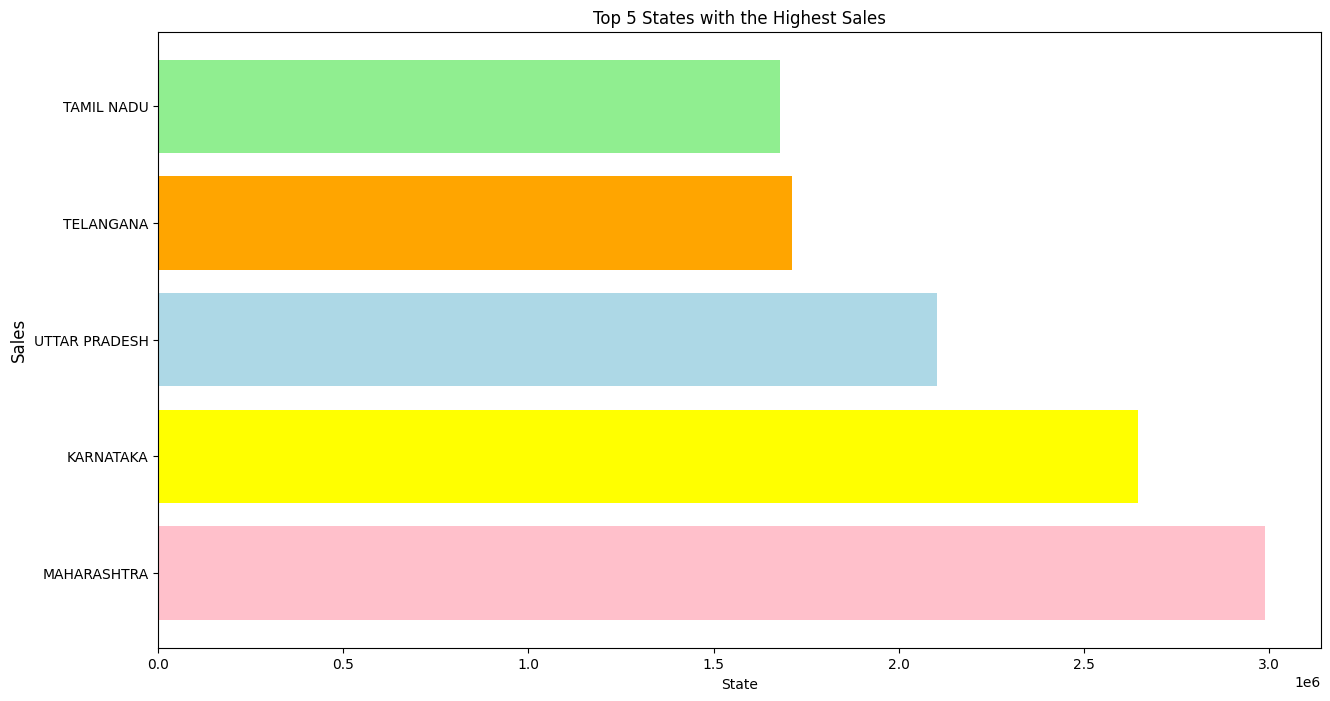

In [354]:
# Chart-2
# Counting sales on the basis of states
plt.figure(figsize=(15,8))
plt.xlabel('State')
plt.ylabel('Sales',fontsize=12)
colors = ['Pink', 'yellow', 'lightblue', 'orange', 'lightgreen']
plt.title("Top 5 States with the Highest Sales")
highest_state_sales = df.groupby('ship-state', as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).rename(columns={'Amount':'Total Sales'})[:5]
plt.barh(highest_state_sales['ship-state'], highest_state_sales['Total Sales'], color= colors)
plt.show()

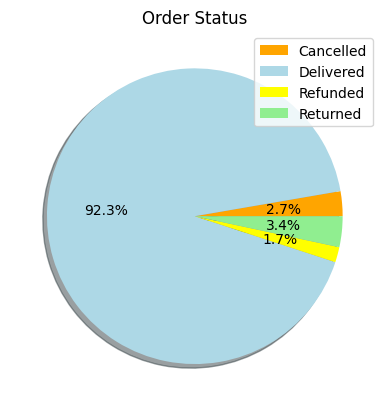

In [355]:
# Chart-3
# Order Status
Order_stats = df.groupby('Status')['Status'].count()
colors = ['orange', 'lightblue', 'yellow', 'lightgreen']
plt.pie(Order_stats, shadow=True,autopct='%1.1f%%', colors=colors)
plt.title("Order Status")
plt.legend(Order_stats.index)
plt.show()

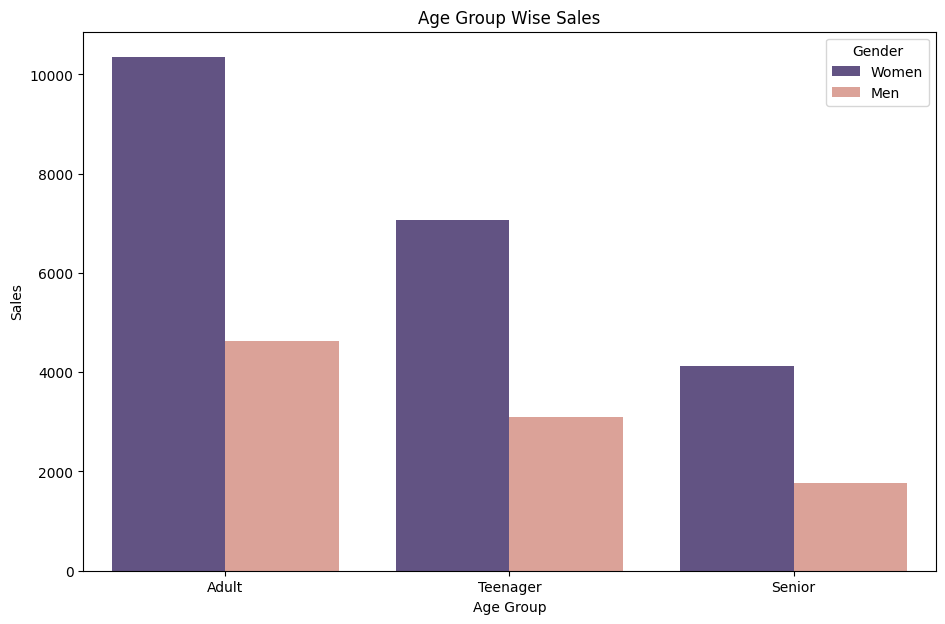

In [356]:
# Chart-4
# Orders On the Basis of Age Group
plt.figure(figsize=(11,7))
colors = ["#5F4B8BFF", "#E69A8DFF"]
#  plot with countplot
sns.countplot(x=df['AgeGroup'], hue = df['Gender'], palette=colors)
plt.title("Age Group Wise Sales")
plt.xlabel('Age Group')
plt.ylabel('Sales')
plt.show()


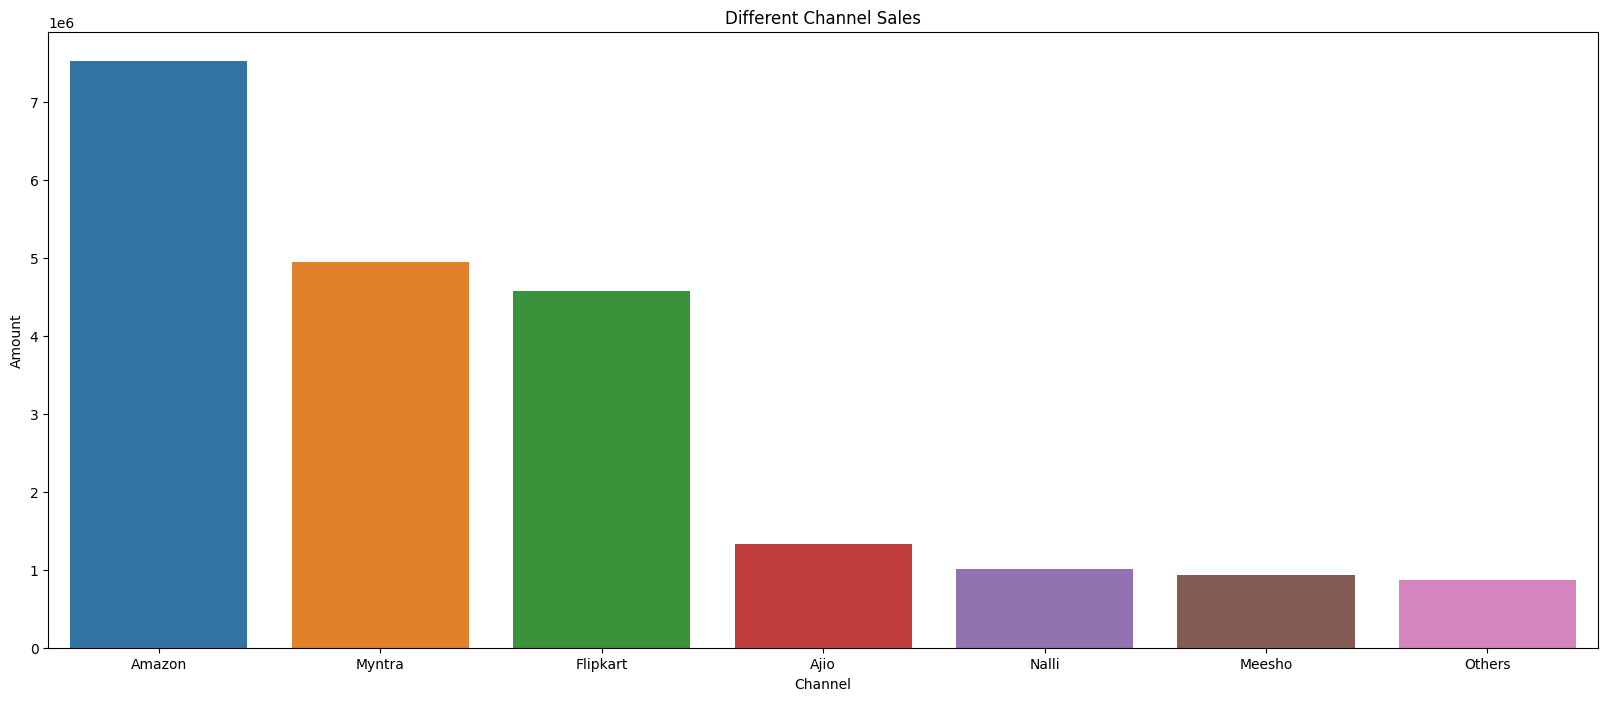

In [357]:
# Chart-5
# Channel Sales
Channel_sales = df.groupby("Channel", as_index=False)['Amount'].sum().sort_values('Amount', ascending = False)
plt.figure(figsize=(20,8))
plt.xlabel('Channels')
plt.ylabel("Sales")
plt.title("Different Channel Sales")
sns.barplot(x=Channel_sales["Channel"], y=Channel_sales["Amount"])
plt.show()

# **Insights**
1. March witnessed the peak in sales, excluding any transactions that were refunded, returned, or canceled.
2. Women contributed to 64% of the total sales.
3. A significant 92% of the total sales were successfully delivered, while the remaining were either refunded, returned, or canceled.
4. Among the regions, Maharashtra had the highest sales value, followed by Karnataka, Uttar Pradesh, Telangana, and Tamil Nadu.
5. Women between the ages of 30 to 49 showed the highest participation in total sales, accounting for 30% of the overall sales.
6. Amazon led the way with 35.51% of total sales, followed by Myntra and Flipkart.
7. Men were the primary consumers of Western dress, making up 89% of the purchases. Additionally, August recorded the highest sales month.


# **Suggestions**
1. I suggest targeting the women customer within the age group of 30 to 49 from the states of Maharashtra, Karnataka & Uttar Pradesh. It would be great if you target the suggested audience through coupons/ads on  Amazon, Myntra & Flipkart.

2. I suggest to perform marketing strategises on the Men Audience for the Western Dress Products

